# 서울시 범죄현황 데이터를 통한 CCTV 설치 필요지역 파악하기

## 1. 서울시 자치구별 범죄현황 데이터 읽어오기

In [95]:
import pandas as pd

# Colab에서는 파일의경로명을 해당 파일에서 점 세개 버튼의 경로 복사로 복사해 사용
#예) Crime_Seoul = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_2주차_실습파일_오프라인/서울시 5대 범죄 발생 현황 통계.txt'.......)

# 강의자료 3, 7쪽 참조, 여기서 불러오로 파일은 encodind = 'utf-8' 또는 생략해도 됨
#('./서울시 5대 범죄 발생 현황 통계.txt', sep= '\t', encoding= 'utf-8')
Crime_Seoul =pd.read_csv('서울시 5대 범죄 발생 현황 통계.txt', sep='\t', encoding= 'utf-8')
Crime_Seoul


,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2019,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
2,2019,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
3,2019,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
4,2019,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
5,2019,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
6,2019,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585
7,2019,동대문구,3692,2818,6,6,10,9,168,143,1531,827,1977,1833
8,2019,중랑구,4268,3138,10,10,4,5,138,108,1666,908,2450,2107
9,2019,성북구,2877,2323,3,3,3,3,176,130,1082,731,1613,1456


## 2. 데이터 살펴보기

### 2-1. 행x열 수, 열이름, 인덱스를 살펴보자

In [99]:
print(Crime_Seoul.shape)
print(Crime_Seoul.columns)
Crime_Seoul.index


(27, 14)
Index(['기간', '자치구', '합계', '합계.1', '살인', '살인.1', '강도', '강도.1', '강간강제추행',
       '강간강제추행.1', '절도', '절도.1', '폭력', '폭력.1'],
      dtype='object')


RangeIndex(start=0, stop=27, step=1)

### 2-2. 데이터의 상위 5행과 하위 5행을 살펴보자

In [102]:
Crime_Seoul.head()

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2019,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
2,2019,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
3,2019,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
4,2019,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823


In [104]:
Crime_Seoul.tail()

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
22,2019,관악구,5328,3810,13,10,10,11,408,335,2223,1085,2674,2369
23,2019,서초구,5542,3750,5,5,7,5,616,412,2270,1118,2644,2210
24,2019,강남구,7304,5069,5,3,5,6,666,562,2970,1339,3658,3159
25,2019,송파구,5698,3799,7,8,10,10,273,230,2416,1016,2992,2535
26,2019,강동구,4014,2955,6,5,15,14,180,155,1650,907,2163,1874


### 2-3. 데이터의 타입, 아이템수, 누락데이터 수 등을 살펴보자

In [107]:
print(Crime_Seoul.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        27 non-null     object
 1   자치구       27 non-null     object
 2   합계        27 non-null     object
 3   합계.1      27 non-null     object
 4   살인        27 non-null     object
 5   살인.1      27 non-null     object
 6   강도        27 non-null     object
 7   강도.1      27 non-null     object
 8   강간강제추행    27 non-null     object
 9   강간강제추행.1  27 non-null     object
 10  절도        27 non-null     object
 11  절도.1      27 non-null     object
 12  폭력        27 non-null     object
 13  폭력.1      27 non-null     object
dtypes: object(14)
memory usage: 3.1+ KB
None


## 3. CCTV 데이터 정리하기

### 3.1 데이터의 컬럼 이름을 변경해보자

In [111]:
#데이터의 열이름 변경:
#'자치구' -> '구별',
#'합계' -> '발생합계', '합계.1' -> '검거합계',
#'살인.1'-> '살인검거',
#'강도.1' -> '강도검거',
#'강간강제추행.1' -> '강간강제추행검거',
#'절도.1' -> '절도검거',
#'폭력.1' -> '폭력검거'

#데이터의 열이름 변경:
#'자치구' -> '구별',
#'합계' -> '발생합계', '합계.1' -> '검거합계',
#'살인.1'-> '살인검거',
#'강도.1' -> '강도검거',
#'강간강제추행.1' -> '강간강제추행검거',
#'절도.1' -> '절도검거',
#'폭력.1' -> '폭력검거'
Crime_Seoul.rename(columns={'자치구':'구별','합계':'발생합계','합계.1':'검거합계','살인.1':'살인검거','강도.1':'강도검거','강간강제추행.1':'강간강제추행검거','절도.1':'절도검거','폭력.1':'폭력검거'}, inplace=True)
Crime_Seoul

,기간,구별,발생합계,검거합계,살인,살인검거,강도,강도검거,강간강제추행,강간강제추행검거,절도,절도검거,폭력,폭력검거
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2019,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
2,2019,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
3,2019,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
4,2019,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
5,2019,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
6,2019,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585
7,2019,동대문구,3692,2818,6,6,10,9,168,143,1531,827,1977,1833
8,2019,중랑구,4268,3138,10,10,4,5,138,108,1666,908,2450,2107
9,2019,성북구,2877,2323,3,3,3,3,176,130,1082,731,1613,1456


### 3.2 불필요한 행과 열을 삭제하자

In [114]:
#'기간'열 삭제 (columns='기간', axis=1, inplace=True)

column_list = ['기간']
Crime_Seoul.drop(columns=column_list, axis=1, inplace=True)
Crime_Seoul.head()


,구별,발생합계,검거합계,살인,살인검거,강도,강도검거,강간강제추행,강간강제추행검거,절도,절도검거,폭력,폭력검거
0,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
2,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
3,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
4,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823


In [116]:
#0,1행 삭제 (index=[0,1], axis=0, inplace=True)
\
Crime_Seoul.drop(index=[0,1], axis=0, inplace=True)
Crime_Seoul.head()

,구별,발생합계,검거합계,살인,살인검거,강도,강도검거,강간강제추행,강간강제추행검거,절도,절도검거,폭력,폭력검거
2,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
3,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
4,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
5,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
6,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


In [118]:
#기존 인덱스를 버리고 인덱스 0부터 다시 설정 (drop=True, inplace=True)  
Crime_Seoul.reset_index(drop=True, inplace=True)
Crime_Seoul.head()



,구별,발생합계,검거합계,살인,살인검거,강도,강도검거,강간강제추행,강간강제추행검거,절도,절도검거,폭력,폭력검거
0,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
1,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
2,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
3,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
4,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


## 4. 범죄현황 데이터 자세히 보기

### 4-1. 범죄발생이 가장 많은/적은 상위 5개 구는 어디일까?

In [122]:
#'범죄발생'이 가장 많은 구, 데이터 '발생합계'열을 기준으로 내림차순 정렬하기

Crime_Seoul.sort_values(by='발생합계', ascending=False, inplace=True)
Crime_Seoul.head()


,구별,발생합계,검거합계,살인,살인검거,강도,강도검거,강간강제추행,강간강제추행검거,절도,절도검거,폭력,폭력검거
22,강남구,7304,5069,5,3,5,6,666,562,2970,1339,3658,3159
18,영등포구,5820,3787,10,10,3,3,356,239,2409,1068,3042,2467
23,송파구,5698,3799,7,8,10,10,273,230,2416,1016,2992,2535
21,서초구,5542,3750,5,5,7,5,616,412,2270,1118,2644,2210
20,관악구,5328,3810,13,10,10,11,408,335,2223,1085,2674,2369


In [124]:
#범죄발생이 가장 적은 구, 데이터 '발생합계'열을 기준으로 오름차순 정렬하기
Crime_Seoul.sort_values(by='발생합계', ascending=True, inplace=True)
Crime_Seoul.head()



,구별,발생합계,검거합계,살인,살인검거,강도,강도검거,강간강제추행,강간강제추행검거,절도,절도검거,폭력,폭력검거
9,도봉구,2110,1497,1,1,5,5,90,83,790,394,1224,1014
3,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
7,성북구,2877,2323,3,3,3,3,176,130,1082,731,1613,1456
12,서대문구,2943,2020,2,1,5,5,175,154,1226,600,1535,1260
17,금천구,3105,2343,6,6,10,6,153,126,1157,615,1779,1590


### 4-2 각 범죄별 검거율을 계산하여 검거율 열을 추가하자

In [127]:
# 각 컬럼의 데이터 타입을 확인
# 검거율을 계산하기 위해서는 데이터가 정수형이거나 실수형이여야 함
# 이 정수형이 아니라 문자열 형임을 알수 있다. 문자열 형은 수학연산이 불가
Crime_Seoul.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 9 to 22
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구별        25 non-null     object
 1   발생합계      25 non-null     object
 2   검거합계      25 non-null     object
 3   살인        25 non-null     object
 4   살인검거      25 non-null     object
 5   강도        25 non-null     object
 6   강도검거      25 non-null     object
 7   강간강제추행    25 non-null     object
 8   강간강제추행검거  25 non-null     object
 9   절도        25 non-null     object
 10  절도검거      25 non-null     object
 11  폭력        25 non-null     object
 12  폭력검거      25 non-null     object
dtypes: object(13)
memory usage: 2.7+ KB


In [129]:
#각 열의 문자열 형의 데이터를 정수형으로 변경
Crime_Seoul = Crime_Seoul.astype({'발생합계':'int64', '검거합계':'int64',
                                  '살인':'int64', '살인검거':'int64',
                                  '강도':'int64', '강도검거':'int64',
                                  '강간강제추행':'int64', '강간강제추행검거':'int64',
                                  '절도':'int64', '절도검거':'int64',
                                  '폭력':'int64', '폭력검거':'int64'})
Crime_Seoul.head()

,구별,발생합계,검거합계,살인,살인검거,강도,강도검거,강간강제추행,강간강제추행검거,절도,절도검거,폭력,폭력검거
9,도봉구,2110,1497,1,1,5,5,90,83,790,394,1224,1014
3,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
7,성북구,2877,2323,3,3,3,3,176,130,1082,731,1613,1456
12,서대문구,2943,2020,2,1,5,5,175,154,1226,600,1535,1260
17,금천구,3105,2343,6,6,10,6,153,126,1157,615,1779,1590


In [131]:
# 각 컬럼의 데이터 타입이 정수형으로 변경되었음 확인

Crime_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 9 to 22
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구별        25 non-null     object
 1   발생합계      25 non-null     int64 
 2   검거합계      25 non-null     int64 
 3   살인        25 non-null     int64 
 4   살인검거      25 non-null     int64 
 5   강도        25 non-null     int64 
 6   강도검거      25 non-null     int64 
 7   강간강제추행    25 non-null     int64 
 8   강간강제추행검거  25 non-null     int64 
 9   절도        25 non-null     int64 
 10  절도검거      25 non-null     int64 
 11  폭력        25 non-null     int64 
 12  폭력검거      25 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.7+ KB


In [133]:
#검거 수/발생 수 * 100
#예시) Crime_Seoul['검거율'] = Crime_Seoul['검거합계']/ Crime_Seoul['발생합계']  * 100
#예시) Crime_Seoul['살인검거율'] = Crime_Seoul['살인검거']/ Crime_Seoul['살인']  * 100
Crime_Seoul['검거율'] = Crime_Seoul['검거합계']/ Crime_Seoul['발생합계']  * 100
Crime_Seoul['살인검거율'] = Crime_Seoul['살인검거']/ Crime_Seoul['살인']  * 100
Crime_Seoul['강도검거율'] = Crime_Seoul['강도검거']/ Crime_Seoul['강도']  * 100
Crime_Seoul['강간강제추행검거율'] = Crime_Seoul['강간강제추행검거']/ Crime_Seoul['강간강제추행']  * 100
Crime_Seoul['절도검거율'] = Crime_Seoul['절도검거']/ Crime_Seoul['절도']  * 100
Crime_Seoul['폭력검거율'] = Crime_Seoul['폭력검거']/ Crime_Seoul['폭력']  * 100
Crime_Seoul.head()

,구별,발생합계,검거합계,살인,살인검거,강도,강도검거,강간강제추행,강간강제추행검거,절도,절도검거,폭력,폭력검거,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
9,도봉구,2110,1497,1,1,5,5,90,83,790,394,1224,1014,70.947867,100.000000,100.000000,92.222222,49.873418,82.843137
3,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216,73.168790,83.333333,111.111111,72.180451,52.680412,87.230990
7,성북구,2877,2323,3,3,3,3,176,130,1082,731,1613,1456,80.743830,100.000000,100.000000,73.863636,67.560074,90.266584
12,서대문구,2943,2020,2,1,5,5,175,154,1226,600,1535,1260,68.637445,50.000000,100.000000,88.000000,48.939641,82.084691
17,금천구,3105,2343,6,6,10,6,153,126,1157,615,1779,1590,75.458937,100.000000,60.000000,82.352941,53.154710,89.376054


### 4-3. 각 범죄의 검거수를 삭제하자.

In [136]:
#각 범죄의 검거 열은 삭제, 검거수는 검거율로 대체해 사용 
#(columns=['살인검거','강도검거','강간강제추행검거','절도검거', '폭력검거'], axis=1, inplace=True)
column_list = ['살인검거','강도검거','강간강제추행검거','절도검거', '폭력검거']
Crime_Seoul.drop(columns=column_list, axis=1, inplace=True)
Crime_Seoul


,구별,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
9,도봉구,2110,1497,1,5,90,790,1224,70.947867,100.000000,100.000000,92.222222,49.873418,82.843137
3,성동구,2512,1838,6,9,133,970,1394,73.168790,83.333333,111.111111,72.180451,52.680412,87.230990
7,성북구,2877,2323,3,3,176,1082,1613,80.743830,100.000000,100.000000,73.863636,67.560074,90.266584
12,서대문구,2943,2020,2,5,175,1226,1535,68.637445,50.000000,100.000000,88.000000,48.939641,82.084691
17,금천구,3105,2343,6,10,153,1157,1779,75.458937,100.000000,60.000000,82.352941,53.154710,89.376054
14,양천구,3214,2124,6,2,127,1477,1602,66.085874,100.000000,100.000000,88.188976,42.924848,85.518102
2,용산구,3313,2611,3,3,272,999,2036,78.810746,100.000000,133.333333,87.132353,54.454454,89.538310
19,동작구,3400,2195,4,1,251,1328,1816,64.558824,50.000000,100.000000,43.824701,43.599398,82.764317
5,동대문구,3692,2818,6,10,168,1531,1977,76.327194,100.000000,90.000000,85.119048,54.016982,92.716237
8,강북구,3838,3023,6,3,176,1229,2424,78.764982,100.000000,66.666667,82.386364,54.027665,91.006601


### 4-4. 범죄의 검거율이 가장 높은/낮은 상위 5개구는 어디일까?

In [139]:
#범죄 검거율이 가장 높은 구, 데이터 '검거율'열을 기준으로 정렬하기
Crime_Seoul.sort_values(by='검거율', ascending=False, inplace=True)
Crime_Seoul.head()


,구별,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
0,종로구,3846,4117,4,7,238,1515,2082,107.046282,125.0,114.285714,480.252101,70.561056,90.874159
7,성북구,2877,2323,3,3,176,1082,1613,80.743830,100.0,100.000000,73.863636,67.560074,90.266584
2,용산구,3313,2611,3,3,272,999,2036,78.810746,100.0,133.333333,87.132353,54.454454,89.538310
8,강북구,3838,3023,6,3,176,1229,2424,78.764982,100.0,66.666667,82.386364,54.027665,91.006601
11,은평구,3880,3000,3,1,194,1565,2117,77.319588,100.0,100.000000,83.505155,62.428115,87.718470


In [141]:
#범죄 검거율이 가장 낮은 구, 데이터 '검거율'열을 기준으로 정렬하기
Crime_Seoul.sort_values(by='검거율', ascending=True, inplace=True)
Crime_Seoul.head()


,구별,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
19,동작구,3400,2195,4,1,251,1328,1816,64.558824,50.0,100.000000,43.824701,43.599398,82.764317
1,중구,4327,2804,2,6,195,2202,1922,64.802404,50.0,83.333333,58.974359,47.683924,84.963580
18,영등포구,5820,3787,10,3,356,2409,3042,65.068729,100.0,100.000000,67.134831,44.333748,81.097962
13,마포구,4842,3170,2,2,495,2190,2153,65.468815,100.0,100.000000,84.242424,41.872146,85.090571
14,양천구,3214,2124,6,2,127,1477,1602,66.085874,100.0,100.000000,88.188976,42.924848,85.518102


## 5. 인구수와 CCTV수 데이터와 범죄 현황 데이터 합치기

### 5-1 인구수와 CCTV 수 데이터 가져오기

In [145]:
# 서울시 자치구별 CCTV 현황 분석에서 정리하여 저장했던 'CCTV_pop.xlsx' 액셀 파일 열기

CCTV_pop = pd.read_excel('./CCTV_pop.xlsx')
CCTV_pop.head()

,구별,총계,2017년,2018년,2019년,2017년 이전,최근증가율,인구수,남성,여성,여성비율,남성비율
0,종로구,1729,259,85,9,1376,25.654070,151290,73746,77544,51.255205,48.744795
1,중구,2001,462,228,194,1117,79.140555,126171,61910,64261,50.931672,49.068328
2,용산구,2383,351,125,307,1600,48.937500,228670,110356,118314,51.740062,48.259938
3,성동구,3515,790,409,262,2054,71.129503,300889,147273,153616,51.054043,48.945957
4,광진구,2556,675,465,712,704,263.068182,351350,170262,181088,51.540629,48.459371


In [146]:
# CCTV_pop 데이터에서 '총계','인구수' 열만 가져와서 추가하기 
Crime_Seoul['CCTV수']=CCTV_pop['총계']
Crime_Seoul['인구수']=CCTV_pop['인구수']
Crime_Seoul.head()

,구별,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,CCTV수,인구수
19,동작구,3400,2195,4,1,251,1328,1816,64.558824,50.0,100.000000,43.824701,43.599398,82.764317,2262,395963
1,중구,4327,2804,2,6,195,2202,1922,64.802404,50.0,83.333333,58.974359,47.683924,84.963580,2001,126171
18,영등포구,5820,3787,10,3,356,2409,3042,65.068729,100.0,100.000000,67.134831,44.333748,81.097962,3773,367678
13,마포구,4842,3170,2,2,495,2190,2153,65.468815,100.0,100.000000,84.242424,41.872146,85.090571,2401,374035
14,양천구,3214,2124,6,2,127,1477,1602,66.085874,100.0,100.000000,88.188976,42.924848,85.518102,3307,458165


In [147]:
#구별로 인덱스 설정
Crime_Seoul.set_index('구별', inplace=True)
Crime_Seoul.head()

,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,CCTV수,인구수
구별,,,,,,,,,,,,,,,
동작구,3400,2195,4,1,251,1328,1816,64.558824,50.0,100.000000,43.824701,43.599398,82.764317,2262,395963
중구,4327,2804,2,6,195,2202,1922,64.802404,50.0,83.333333,58.974359,47.683924,84.963580,2001,126171
영등포구,5820,3787,10,3,356,2409,3042,65.068729,100.0,100.000000,67.134831,44.333748,81.097962,3773,367678
마포구,4842,3170,2,2,495,2190,2153,65.468815,100.0,100.000000,84.242424,41.872146,85.090571,2401,374035
양천구,3214,2124,6,2,127,1477,1602,66.085874,100.0,100.000000,88.188976,42.924848,85.518102,3307,458165


## 5. 범죄 데이터 시각화 하기

In [150]:
#한글 폰트 깨짐 방지 코드
import matplotlib.pyplot as plt
import seaborn as sns

import platform
path = "c:/windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system... sorry~~~')    

'''
#코랩일 경우 위의 코드는 주석처리 아래의 코드로 실행
적용이 안되면 상단 런타임 메뉴에서 다시시작 및 모두실행으로 실행
그래도 안되면 런타임 메뉴에서 런타임 다시시작 -> 다시시작 및 모두실행

#한글 폰트 깨짐 방지 코드
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
'''

"\n#코랩일 경우 위의 코드는 주석처리 아래의 코드로 실행\n적용이 안되면 상단 런타임 메뉴에서 다시시작 및 모두실행으로 실행\n그래도 안되면 런타임 메뉴에서 런타임 다시시작 -> 다시시작 및 모두실행\n\n#한글 폰트 깨짐 방지 코드\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\nimport matplotlib as mpl \nimport matplotlib.pyplot as plt \nimport matplotlib.font_manager as fm  \n\n!apt-get update -qq\n!apt-get install fonts-nanum* -qq\n\npath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' \nfont_name = fm.FontProperties(fname=path, size=10).get_name()\nprint(font_name)\nplt.rc('font', family=font_name)\n\nfm._rebuild()\nmpl.rcParams['axes.unicode_minus'] = False\n"

### 5.1 범죄 발생수가 가장 많은 구는 어디인가?

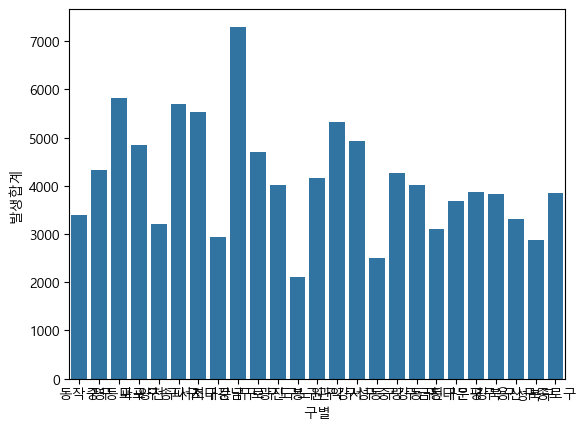

In [154]:
#막대 그래프 그리기
# '발생합계로 소팅하여 막대 그래프 그리기
sns.barplot(x=Crime_Seoul.index, y=Crime_Seoul['발생합계'])
plt.show()

### 5.2 범죄 검거율이 가장 높은 구는 어디인가?

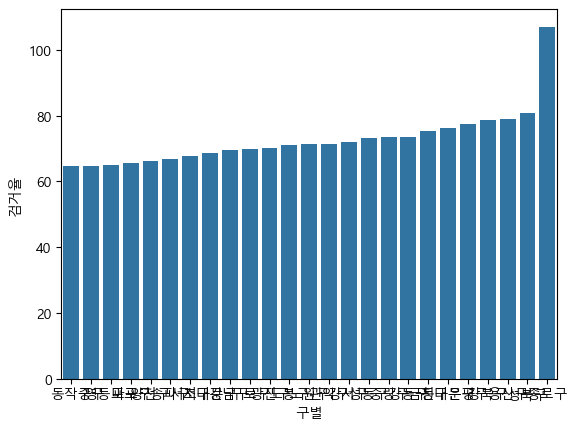

In [156]:
#막대 그래프 그리기
# '검거율'로 소팅하여 막대 그래프 그리기
sns.barplot(x=Crime_Seoul.index, y=Crime_Seoul['검거율'])
plt.show()

### 5.3 CCTV수가 가장 많은 구는 어디일까?

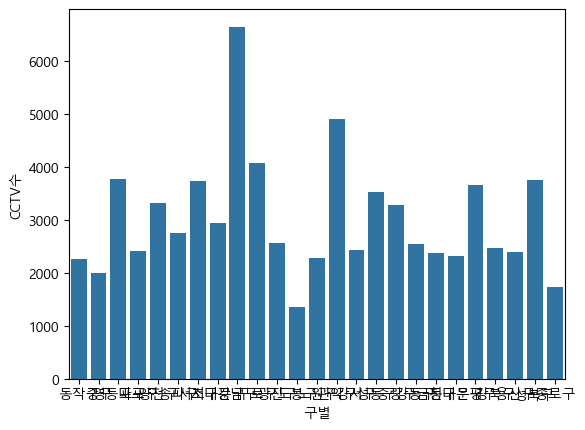

In [158]:
#막대 그래프 그리기
# 'CCTV수'로 소팅하여 막대 그래프 그리기
sns.barplot(x=Crime_Seoul.index, y=Crime_Seoul['CCTV수'])
plt.show()

### 5.4 강도, 살인, 폭력은 어떤 관계에 있을까?

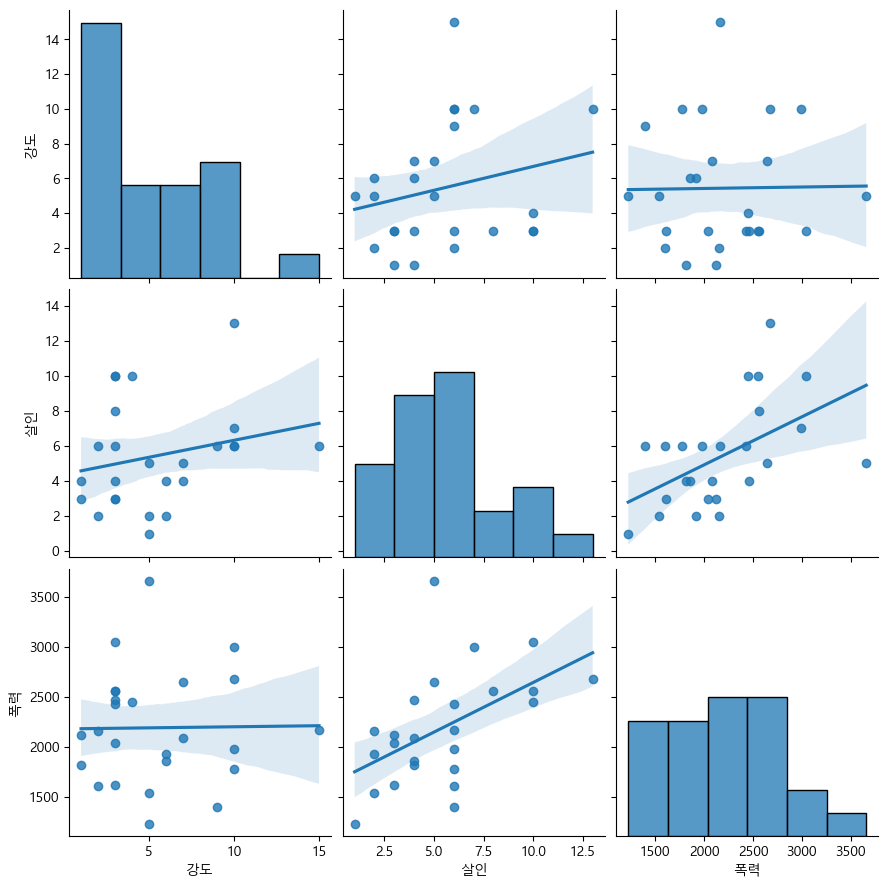

In [160]:
#강도, 살인, 폭력에 대한 상간관계 그래프 
#pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램 또는 분포도를 그려주는 함수
sns.pairplot(Crime_Seoul, vars=['강도','살인','폭력'], kind='reg', height=3) #kind='reg'는 차트 종류를 산점도라는 의미
plt.show()

### 5.5 살인, 강도와 인구수와 CCTV수와 어떤 관계에 있을까?

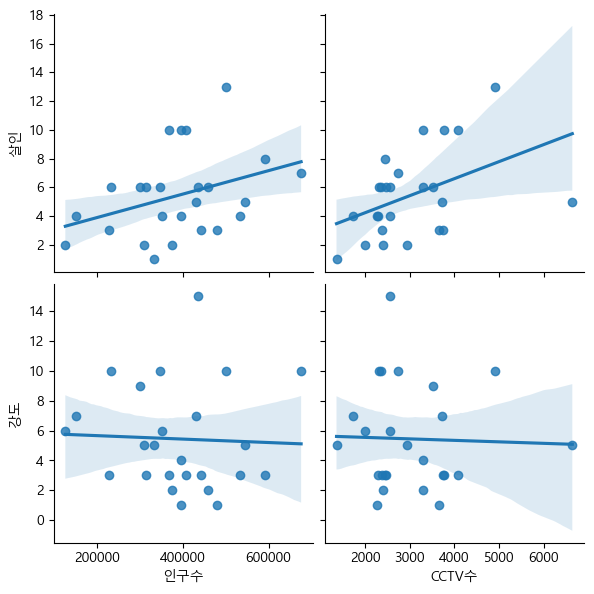

In [162]:
#살인, 강도, 인구수, CCTV수에 대한 상간관계 그래프 
#pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램 또는 분포도를 그려주는 함수
sns.pairplot(Crime_Seoul, x_vars=['인구수','CCTV수'], y_vars=['살인','강도'], kind='reg', height=3) #kind='reg'는 차트 종류를 산점도라는 의미
plt.show()

### 5.6 인구수와 CCTV수는 살인검거율과 폭력검거율과 어떤 관계에 있을까?

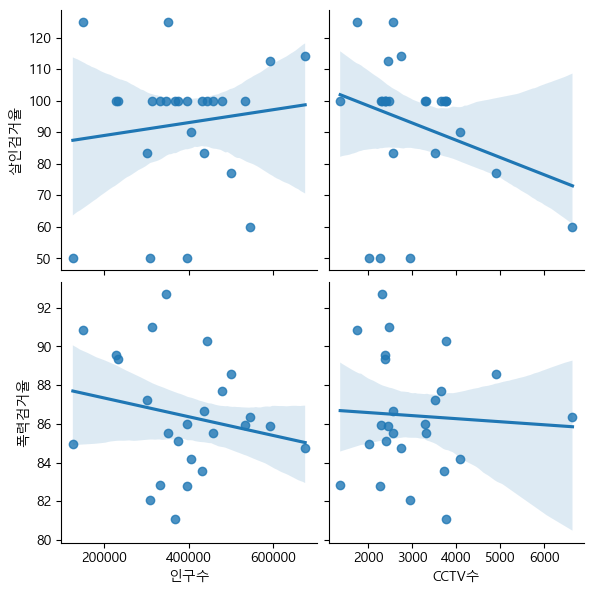

In [164]:
#살인, 강도, 인구수, CCTV수에 대한 상간관계 그래프 
#pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램 또는 분포도를 그려주는 함수
sns.pairplot(Crime_Seoul, x_vars=['인구수','CCTV수'], y_vars=['살인검거율','폭력검거율'], kind='reg', height=3) #kind='reg'는 차트 종류를 산점도라는 의미
plt.show()

In [165]:
Crime_Seoul.head()

,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,CCTV수,인구수
구별,,,,,,,,,,,,,,,
동작구,3400,2195,4,1,251,1328,1816,64.558824,50.0,100.000000,43.824701,43.599398,82.764317,2262,395963
중구,4327,2804,2,6,195,2202,1922,64.802404,50.0,83.333333,58.974359,47.683924,84.963580,2001,126171
영등포구,5820,3787,10,3,356,2409,3042,65.068729,100.0,100.000000,67.134831,44.333748,81.097962,3773,367678
마포구,4842,3170,2,2,495,2190,2153,65.468815,100.0,100.000000,84.242424,41.872146,85.090571,2401,374035
양천구,3214,2124,6,2,127,1477,1602,66.085874,100.0,100.000000,88.188976,42.924848,85.518102,3307,458165


In [166]:
#범죄발생수, 검거율, CCTV수, 인구수 항목만 따로 가져오기 
df = Crime_Seoul[['발생합계','검거율','CCTV수','인구수']]
df.head()
#항목별 상관관계 살펴보기, 대각선을 중심으로 대칭, 음수는 두 데이터가 음의 상관관게, 양수는 양의 상간관계,
#절대값이 1에 가까울 수록 상관도가 높음
df.corr()

,발생합계,검거율,CCTV수,인구수
발생합계,1.000000,-0.257863,0.606156,0.490203
검거율,-0.257863,1.000000,-0.215796,-0.374106
CCTV수,0.606156,-0.215796,1.000000,0.441639
인구수,0.490203,-0.374106,0.441639,1.000000


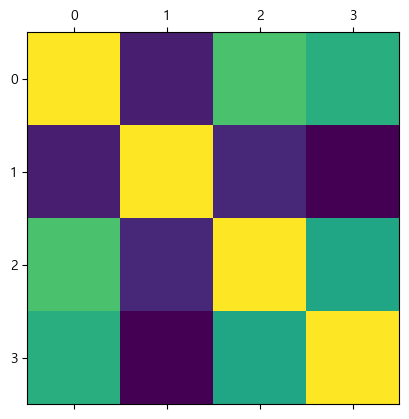

In [167]:
#상관관계 그래프로 보기, 양의 상관관계는 녹색계열, 음의 상관관계는 보라색 계열
plt.matshow(df.corr())

## 6. 위의 분석 결과를 보고 CCTV수가 범죄발생 및 검거에 미치는 영향과 CCTV 설치에 대한 자신의 생각을 아래에 정리해 보자

### 나의생각 :








